<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/9_4_Equipo_1_Google_Colab_Con_Algoritmo_de_segmentacion_otsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

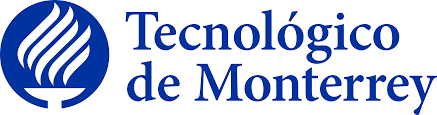

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 9.5 Google Colab con algoritmo Otsu

**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

- Revisar los ejercicios propuestos antes de codificar e identificar las secciones de libro o de las diapositivas que te puedan servir como soporte.

- Experimenta con diferentes imagenes ademas de las provistas en en Colab, identifca imagenes con diferentes backgrounds y estilos, cuales son las limitaciones de single thresholding contra el algoritmo de Otsu.

- (Opcional) Como en un proyecto previo, es posible aplicar Otsu para ventanas de diferentes tamaños, obteniendo mejores resultados. Realiza esta implementacion y ve como mejoran los resultados con el ejemplo de la hoja de papel.

# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpig
from sklearn.cluster import MeanShift, estimate_bandwidth
%matplotlib inline
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

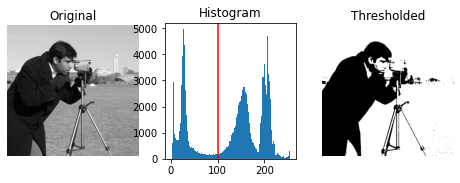

In [ ]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




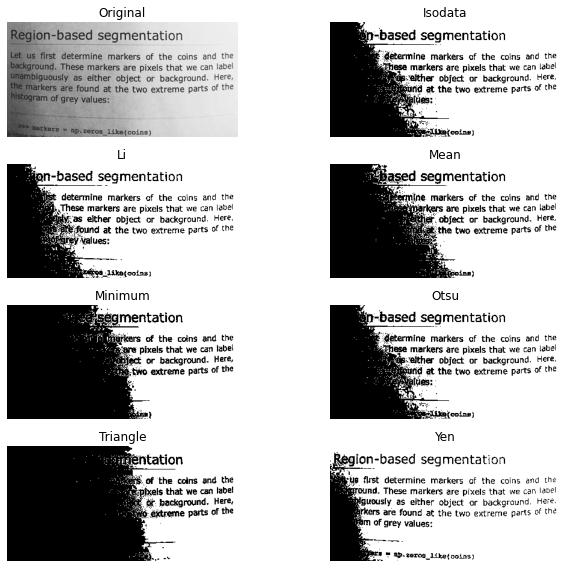

In [ ]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
# TODO: Slide image for segmentation, alpha blerding

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

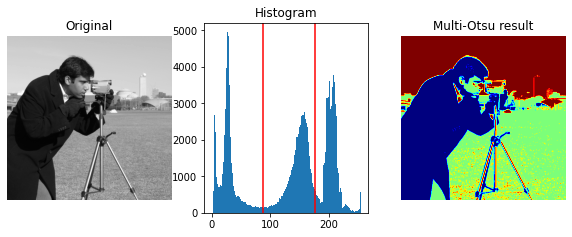

In [ ]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

#Equipo Pruebas

In [ ]:
def SinOtsuMethod (image):
  thresh = threshold_otsu(image)
  binary = image > thresh

  fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
  ax = axes.ravel()
  ax[0] = plt.subplot(1, 3, 1)
  ax[1] = plt.subplot(1, 3, 2)
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

  ax[0].imshow(image, cmap=plt.cm.gray)
  ax[0].set_title('Original')
  ax[0].axis('off')

  ax[1].hist(image.ravel(), bins=256)
  ax[1].set_title('Histogram')
  ax[1].axvline(thresh, color='r')

  ax[2].imshow(binary, cmap=plt.cm.gray)
  ax[2].set_title('Thresholded')
  ax[2].axis('off')
  plt.subplots_adjust()

  plt.show()

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


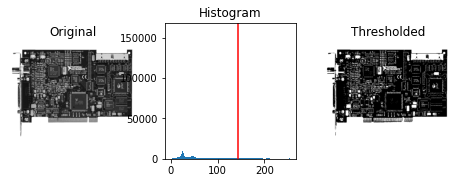

******************************************************************************************



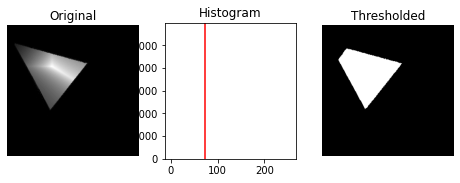

******************************************************************************************



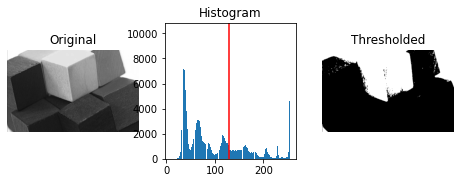

******************************************************************************************



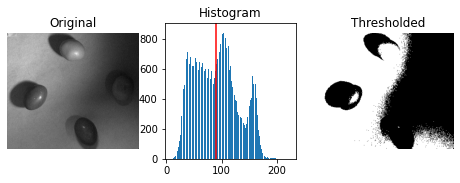

******************************************************************************************



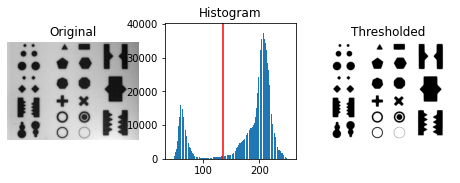

******************************************************************************************



In [ ]:
image1 = cv.imread("/content/otsu.bmp")
img_gray1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
image2 = cv.imread("/content/otsu.png")
img_gray2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
image3 = cv.imread("/content/Color cubes.jpg")
img_gray3 = cv.cvtColor(image3, cv.COLOR_BGR2GRAY)
image4 = cv.imread("/content/otsu2.png")
img_gray4 = cv.cvtColor(image4, cv.COLOR_BGR2GRAY)
image5 = cv.imread("/content/otsu3.png")
img_gray5 = cv.cvtColor(image5, cv.COLOR_BGR2GRAY)

images_otsu = [img_gray1, img_gray2, img_gray3,img_gray4,img_gray5]

for im in images_otsu:
  SinOtsuMethod(im)
  print("******************************************************************************************\n")

In [ ]:
def MultiOtsuMethod (image):
  # Applying multi-Otsu threshold for the default value, generating
  # three classes.
  thresholds = threshold_multiotsu(image)

  # Using the threshold values, we generate the three regions.
  regions = np.digitize(image, bins=thresholds)

  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

  # Plotting the original image.
  ax[0].imshow(image, cmap='gray')
  ax[0].set_title('Original')
  ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
  ax[1].hist(image.ravel(), bins=255)
  ax[1].set_title('Histogram')
  for thresh in thresholds:
      ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
  ax[2].imshow(regions, cmap='jet')
  ax[2].set_title('Multi-Otsu result')
  ax[2].axis('off')

  plt.subplots_adjust()

  plt.show()

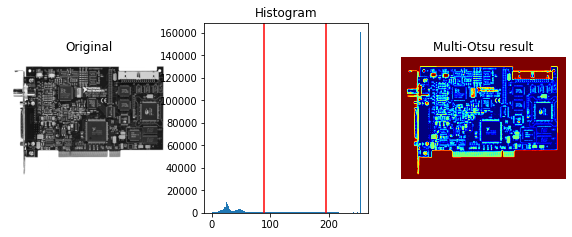

******************************************************************************************



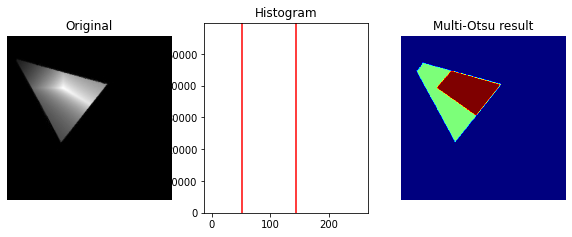

******************************************************************************************



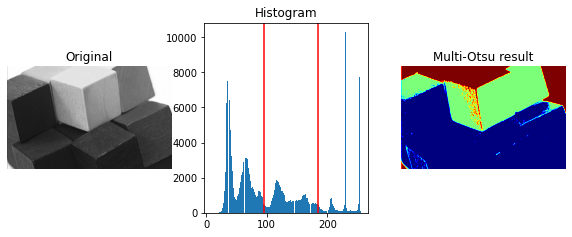

******************************************************************************************



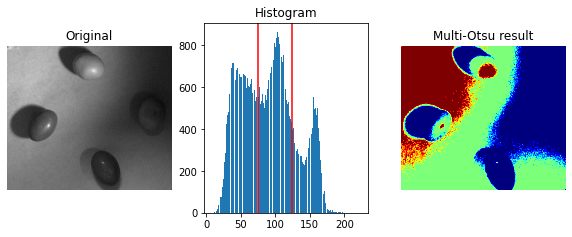

******************************************************************************************



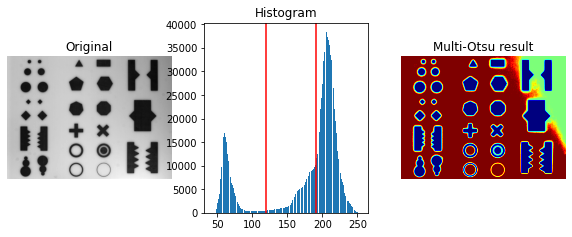

******************************************************************************************



In [ ]:
for im in images_otsu:
  MultiOtsuMethod(im)
  print("******************************************************************************************\n")

## Conclusiones

El método Otsu es un buen método para detectar diferentes regiones en las imagenes basado en la distribución de probabilidad de los pixeles de estas.

Basado en la distribución podemos segregar las regiones de pixeles de las imagenes basado en hacer las divisiones en puntos en los que se minimice la varianza entre las clases.

En los ejemplos anteriores podemos observar gracias a los histogramas a partir de que valor se proponen los "Tresholdings" a manera de segmentar los pixeles de la imagen en grupos en donde los pixeles tiendan a ciertos valores comunes entre sus clases.

Podemos utilizar el método Otsu tanto para realizar un Tresholding simple optimizado como para detectar diferentes regiones en la imagen, también observamos que Otsu nos ayuda a identificar brillos en las imagenes ya que divide estos en otras regiones a diferencia de un Tresholding básico en donde únicamente podemos detectar una forma en particular.

#Referencias:

- Dr. Sapna Katiyar. (21 de octubre de 2020). L50 | Introduction to Image Segmentation | Segmentation Classification || Digital Image Processing [Archivo de video]. Youtube. https://www.youtube.com/watch?v=RsJA3OUN1ZY

- Ekeeda. (12 de enero de 2020). Introduction to Image Segmentation - Image Segmentation -Image Processing [Archivo de video]. Youtube. https://www.youtube.com/watch?v=JToLE6gaZzs 

- Gonzalez, R. & Woods, R. (2018). Digital Image Processing. 4° Edition. Pearson

- Ruiz, G. O. (2023). Tema 5.2 Histogramas por método de Otsu.

- Ochoa, G. (2023). Módulo 5. Introducción y objetivos [Video]. ITESM.





- 